## Data Analysis ##

###  Data analysis part 1###

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\91973\OneDrive\Documents\mydata.csv')

In [5]:
dataset  =df.copy()

In [6]:
df.head(12) # first 12 rows of the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [7]:
df.shape # shape of our data set 6362620 rows 11 columns

(1048575, 11)

In [8]:
print(df['isFlaggedFraud'].value_counts())
print('-------------------------------------')
print(df['isFraud'].value_counts())

0    1048575
Name: isFlaggedFraud, dtype: int64
-------------------------------------
0    1047433
1       1142
Name: isFraud, dtype: int64


In [9]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
step,1048575.0,26.97,15.62,1.0,15.00,20.00,39.00,95.0
amount,1048575.0,158666.98,264940.93,0.1,12149.06,76343.33,213761.89,10000000.0
oldbalanceOrg,1048575.0,874009.54,2971750.56,0.0,0.00,16002.00,136642.02,38900000.0
newbalanceOrig,1048575.0,893808.90,3008271.33,0.0,0.00,0.00,174599.99,38900000.0
oldbalanceDest,1048575.0,978160.05,2296780.39,0.0,0.00,126377.21,915923.48,42100000.0
newbalanceDest,1048575.0,1114197.97,2416593.12,0.0,0.00,218260.36,1149807.51,42200000.0
isFraud,1048575.0,0.00,0.03,0.0,0.00,0.00,0.00,1.0
isFlaggedFraud,1048575.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0


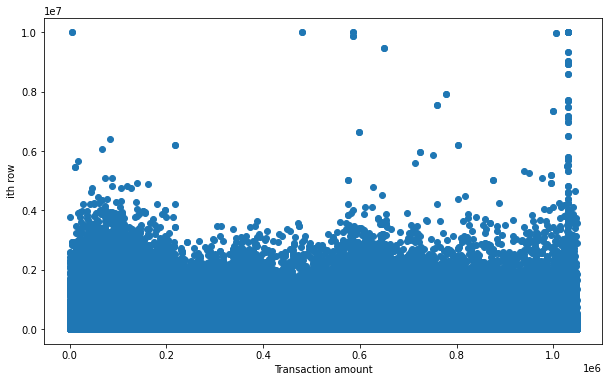

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xlabel('Transaction amount')
plt.ylabel('ith row')
ax.scatter(df.index, df.amount);

C:\Users\91973\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of obervations in each transaction type')

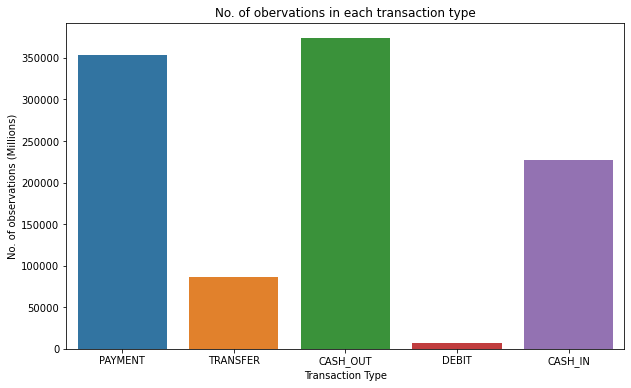

In [11]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(df['type'])
plt.xlabel('Transaction Type')
plt.ylabel('No. of observations (Millions)')
plt.title('No. of obervations in each transaction type')

### Data analysis part2  +    Data Preprocessing 

In [12]:
print(df.isnull().values.any())
df.isnull().sum()

False


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Observation : 
    This data is clean no missing values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [14]:
df_fraud  = df[(df['isFraud']==1)]

In [15]:
print('count of all different values in name Origin column')
print(df['nameOrig'].value_counts().head())
print()
print('*************************************************************')
print('count of all different values in name Origin column which is a fraud transcation ')
print(df_fraud['nameOrig'].value_counts().head())

count of all different values in name Origin column
C208262306     2
C1820871729    2
C1214450722    2
C1041466144    2
C1736268937    2
Name: nameOrig, dtype: int64

*************************************************************
count of all different values in name Origin column which is a fraud transcation 
C1074348771    1
C705152518     1
C920803432     1
C142707413     1
C451243683     1
Name: nameOrig, dtype: int64


In [16]:
print('count of all different values in name Destination column')
print(df['nameDest'].value_counts().head())
print()
print('*************************************************************')
print('count of all different values in name Destination column which is a fraud transcation ')
print(df_fraud['nameDest'].value_counts().head())

count of all different values in name Destination column
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
Name: nameDest, dtype: int64

*************************************************************
count of all different values in name Destination column which is a fraud transcation 
C935310781     2
C185805228     2
C200064275     2
C1013511446    2
C803116137     2
Name: nameDest, dtype: int64


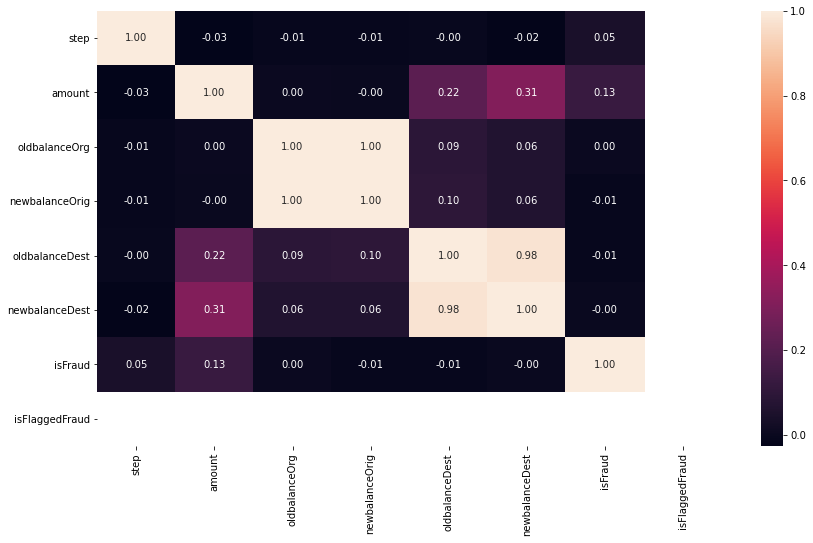

In [17]:
corrMatrix = df.corr()
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(corrMatrix, annot=True,fmt='.2f')
plt.show()

In [18]:
df = df.drop(columns=['nameDest', 'nameOrig'], axis=1)

In [19]:
def applyf(tp) :
    if tp == 'CASH_OUT':
        return 0 
    elif tp == 'PAYMENT': 
        return 1
    elif tp == 'CASH_IN': 
        return 2
    elif tp == 'TRANSFER': 
        return 3
    elif tp == 'DEBIT': 
        return 4
df.type=  df.type.apply(applyf)

In [20]:
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,1,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,3,181.00,181.00,0.00,0.0,0.00,1,0
3,1,0,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,1,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,1,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,1,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,1,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,4,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


In [21]:
Y =    df['isFraud']
X =    df.drop('isFraud', axis=1)

We will be dividing the dataset into two main groups. One for training the 
model and the other for Testing our trained model’s performance.

Some classification problems do not have a balanced number of examples for each class label. As such,
it is desirable to split the dataset into train and test sets in
a way that preserves the same proportions of examples in each class as observed in the original dataset.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1,stratify=Y)

In [23]:
print(Y_train.value_counts())
print(Y_test.value_counts())
print("..........................................")
print(Y_train.value_counts()[1]/Y_train.value_counts()[0] ,'       ', Y_train.value_counts()[1]/Y_train.value_counts()[0]  )

0    837946
1       914
Name: isFraud, dtype: int64
0    209487
1       228
Name: isFraud, dtype: int64
..........................................
0.001090762411897664         0.001090762411897664


### Preprocessing using model requirement

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

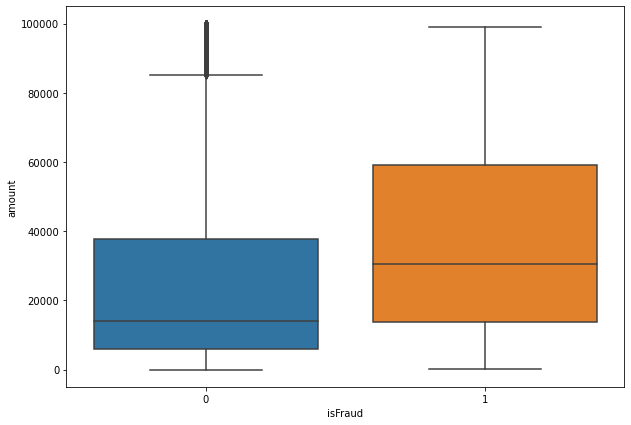

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'isFraud', y = 'amount', data = df[df.amount < 1e5])

In [25]:
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
step,838860.0,26.96,15.62,1.0,15.00,20.00,39.00,95.0
type,838860.0,1.05,0.98,0.0,0.00,1.00,2.00,4.0
amount,838860.0,158843.80,265086.90,0.1,12129.44,76315.05,213818.56,10000000.0
oldbalanceOrg,838860.0,872001.09,2963789.93,0.0,0.00,15980.26,136477.00,38900000.0
newbalanceOrig,838860.0,891850.22,3000280.47,0.0,0.00,0.00,174645.85,38900000.0
oldbalanceDest,838860.0,977108.27,2293287.03,0.0,0.00,126301.18,916432.90,42100000.0
newbalanceDest,838860.0,1113310.82,2413095.19,0.0,0.00,218243.75,1150730.90,42200000.0
isFlaggedFraud,838860.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0


In [26]:
X_test.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
step,209715.0,27.01,15.64,1.00,15.00,20.00,39.00,95.0
type,209715.0,1.05,0.98,0.00,0.00,1.00,2.00,4.0
amount,209715.0,157959.66,264355.71,0.14,12236.51,76509.09,213526.00,10000000.0
oldbalanceOrg,209715.0,882043.37,3003375.78,0.00,0.00,16076.43,137292.84,38200000.0
newbalanceOrig,209715.0,901643.62,3040019.33,0.00,0.00,0.00,174449.70,38300000.0
oldbalanceDest,209715.0,982367.15,2310701.75,0.00,0.00,126703.03,914317.74,41300000.0
newbalanceDest,209715.0,1117746.56,2430537.07,0.00,0.00,218308.07,1147577.34,42100000.0
isFlaggedFraud,209715.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0


Distance algorithms like KNN,and SVM are most affected by the range of features. 


This is because behind the scenes they are using distances between data points to determine their similarity.

In [27]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [28]:
X_train_stand.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
step,838860.0,26.96,15.62,1.00,15.00,20.00,39.00,95.00
type,838860.0,1.05,0.98,0.00,0.00,1.00,2.00,4.00
amount,838860.0,0.00,1.00,-0.60,-0.55,-0.31,0.21,37.12
oldbalanceOrg,838860.0,-0.00,1.00,-0.29,-0.29,-0.29,-0.25,12.83
newbalanceOrig,838860.0,0.00,1.00,-0.30,-0.30,-0.30,-0.24,12.67
oldbalanceDest,838860.0,0.00,1.00,-0.43,-0.43,-0.37,-0.03,17.93
newbalanceDest,838860.0,0.00,1.00,-0.46,-0.46,-0.37,0.02,17.03
isFlaggedFraud,838860.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [29]:
X_test_stand.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
step,209715.0,27.01,15.64,1.00,15.00,20.00,39.00,95.00
type,209715.0,1.05,0.98,0.00,0.00,1.00,2.00,4.00
amount,209715.0,-0.00,1.00,-0.60,-0.55,-0.31,0.21,37.12
oldbalanceOrg,209715.0,0.00,1.01,-0.29,-0.29,-0.29,-0.25,12.59
newbalanceOrig,209715.0,0.00,1.01,-0.30,-0.30,-0.30,-0.24,12.47
oldbalanceDest,209715.0,0.00,1.01,-0.43,-0.43,-0.37,-0.03,17.58
newbalanceDest,209715.0,0.00,1.01,-0.46,-0.46,-0.37,0.01,16.99
isFlaggedFraud,209715.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


##  ML Models using skicit learn ##

In [30]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### DecisionTree model ###

In [31]:
model_decisiontree = DecisionTreeClassifier()
model_decisiontree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [32]:
y_predict_decisiontree = model_decisiontree.predict(X_test)

In [33]:
actual_vs_predict = pd.DataFrame({'Actual': Y_test,
                                'Prediction': y_predict_decisiontree})
actual_vs_predict.sample(10)

,Actual,Prediction
945513,0,0
891851,0,0
614469,0,0
359572,0,0
12475,0,0
835282,0,0
417848,0,0
661342,0,0
404452,0,0
132682,0,0


### Random forest model ###

In [34]:
model_randomforest = RandomForestClassifier()
model_randomforest.fit(X_train, Y_train)

RandomForestClassifier()

In [35]:
y_predict_randomforest = model_randomforest.predict(X_test)

In [36]:
actual_vs_predict = pd.DataFrame({'Actual': Y_test,
                                'Prediction': y_predict_randomforest})
actual_vs_predict.sample(20)

,Actual,Prediction
289975,0,0
601899,0,0
572832,0,0
101766,0,0
794846,0,0
123312,0,0
215622,0,0
853975,0,0
836266,0,0
182754,0,0


### SVC classifier ##

In [37]:
model_svc =  SVC()
model_svc.fit(X_train_stand, Y_train)

SVC()

In [38]:
y_predict_svc = model_svc.predict(X_test_stand)

In [39]:
actual_vs_predict = pd.DataFrame({'Actual': Y_test,
                               'Prediction': y_predict_svc})
actual_vs_predict.sample(10)

,Actual,Prediction
137576,0,0
244765,0,0
6826,0,0
777875,0,0
908036,0,0
709710,0,0
808832,0,0
405265,0,0
580332,0,0
1005550,0,0


### KNN classifier ##

In [40]:
model_knn = KNeighborsClassifier(3)
model_knn.fit(X_train_stand, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_predict_knn = model_knn.predict(X_test_stand)

In [42]:
actual_vs_predict = pd.DataFrame({'Actual': Y_test,
                                'Prediction': y_predict_knn})
actual_vs_predict.sample(10)

,Actual,Prediction
508588,0,0
206831,0,0
251469,0,0
482168,0,0
712555,0,0
424533,0,0
820587,0,0
988231,0,0
849606,0,0
305738,0,0


### LogisticRegression classifier ###

In [43]:
model_logisticRegression = LogisticRegression()
model_logisticRegression.fit(X_train, Y_train)

LogisticRegression()

In [44]:
y_predict_logisticRegression = model_logisticRegression.predict(X_test)

In [45]:
actual_vs_predict = pd.DataFrame({'Actual': Y_test,
                                'Prediction': y_predict_logisticRegression})
actual_vs_predict.sample(10)

,Actual,Prediction
786416,0,0
477245,0,0
536922,0,0
318456,0,0
373551,0,0
116798,0,0
275790,0,0
283955,0,0
890881,0,0
584973,0,0


In [46]:
print('Classification metrics: \n', classification_report(Y_test, y_predict_logisticRegression))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.56      0.32      0.41       228

    accuracy                           1.00    209715
   macro avg       0.78      0.66      0.70    209715
weighted avg       1.00      1.00      1.00    209715



## Model evaluation and Classification metrics ##

In [47]:
#we evaluate the model's performance with mainstream classification metrics.

In [48]:
print('Classification metrics: \n', classification_report(Y_test, y_predict_decisiontree))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.75      0.83      0.79       228

    accuracy                           1.00    209715
   macro avg       0.87      0.92      0.89    209715
weighted avg       1.00      1.00      1.00    209715



In [49]:
print('Classification metrics: \n', classification_report(Y_test, y_predict_randomforest))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.97      0.82      0.89       228

    accuracy                           1.00    209715
   macro avg       0.99      0.91      0.95    209715
weighted avg       1.00      1.00      1.00    209715



In [50]:
print('Classification metrics: \n', classification_report(Y_test,y_predict_svc))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       1.00      0.43      0.60       228

    accuracy                           1.00    209715
   macro avg       1.00      0.71      0.80    209715
weighted avg       1.00      1.00      1.00    209715



In [51]:
print('Classification metrics: \n', classification_report(Y_test, y_predict_knn))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.92      0.54      0.68       228

    accuracy                           1.00    209715
   macro avg       0.96      0.77      0.84    209715
weighted avg       1.00      1.00      1.00    209715

